# .1 书上的代码
0. 书上的代码还用的是pkl.gz格式
```python
import pickle
import gzip
import numpy as np

from dlgo.nn.load_mnist import encode_label, shape_data
def encode_label_in_book(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

def shape_data_in_book(data):
    features = [np.reshape(x, (784, 1)) for x in data[0]]
    labels = [encode_label(y) for y in data[1]]
    return zip(features, labels)
def load_data_in_book():
    with gzip.open('mnist.pkl.gz', 'rb') as f:
        train_data, validation_data, test_data = pickle.load(f)
    return shape_data(train_data), shape_data(test_data)
```

# .2 github上实际的代码
## .2.1 实际代码

In [11]:
import numpy as np


def encode_label(j):  # <1>
    e = np.zeros((10, 1)) # zeros这个方法的参数，就是一个元组，这个元组指定了数组的维度。
    e[j] = 1.0 #这里，用e[j,0] = 1.0，也是一样的。如果有多列，应该这么写。
    return e

def shape_data(data):
    features = [np.reshape(x, (784, 1)) for x in data[0]]  # <1>
    labels = [encode_label(y) for y in data[1]]  # <2>
    return list(zip(features, labels))  # <3>


def load_data_impl():
    # file retrieved by:
    #   wget https://s3.amazonaws.com/img-datasets/mnist.npz -O code/dlgo/nn/mnist.npz
    # code based on:
    #   site-packages/keras/datasets/mnist.py
    path = 'mnist.npz'
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    
    return (x_train, y_train), (x_test, y_test)

def load_data():
    train_data, test_data = load_data_impl()
    return shape_data(train_data), shape_data(test_data)

## .2.1 执行方法时要赋值给变量
0. 不然恐怕会有返回值到页面，执行时间会超长
```python
train_data1, test_data1 = load_data_impl() # 这种返回值超大的方法，要赋值给变量。
st1 = shape_data(test_data1)
```

## .2.2 从存储格式到训练格式
0. data有两列，就是原始的x和y两列，假设都是10000个数据。
0. 经过这个方法后，就变成10000行，每行都是一个tuple，有两个数据
0. 每个数据都是ndarray类型。nd就是ndim。
0. 这个转换后的格式，就是可以直接用来训练的。
```python
def shape_data(data):
    features = [np.reshape(x, (784, 1)) for x in data[0]]  # <1>
    labels = [encode_label(y) for y in data[1]]  # <2>
    return list(zip(features, labels))  # <3>
```

"""
0. 这是通义给出的数据结构的描述。
test_data_1[0] == (
    np.array([[...]], shape=(784, 1)),  # 特征向量，一个784维的向量
    np.array([[0., 0., 1., ..., 0., 0., 0.]], shape=(10, 1)),  # 标签向量，独热编码形式
)
"""

# .3. 加载数据

In [17]:
train_data_1, test_data_1 = load_data()

## .3.1 操作加载后的书局

In [ ]:
import numpy as np

print(type(train_data_1)) # train_data_1是一个list，list就是数组
print(len(train_data_1)) # 它的长度是6万。
##
print(type(train_data_1[0])) # 6万个数据中，第一个数据类型是tuple元组
print(len(train_data_1[0])) # 6万个数据中，第一个数据是元组类型，并且长度是2
##
print(type(train_data_1[0][0])) # 第一个元组中的第一个元素的类型是numpy.ndarray
print(train_data_1[0][0].shape) # 第一个元组中的第一个元素的shape(784,1)
##
print(type(train_data_1[0][1])) # 第一个元组中的第一个元素的类型是numpy.ndarray
print(train_data_1[0][1].shape) # 第一个元组中的第一个元素的shape(10,1)
y0 = train_data_1[0][1] # 这个是输出，是y，命名为y0
print(y0) # 打印一下y0。
digit = np.argmax(y0)
print(digit)
digit = np.argmax(y0[:,0])
print(digit)

<class 'list'>
60000
<class 'tuple'>
2
<class 'numpy.ndarray'>
(784, 1)
<class 'numpy.ndarray'>
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
5


In [ ]:
import numpy as np
from dlgo.nn.load_mnist import load_data
from dlgo.nn.layers import sigmoid_double
def average_digit(data, digit): 
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)


train, test = load_data()
avg_eight = average_digit(train, 8) 

(784, 1)
(28, 28)


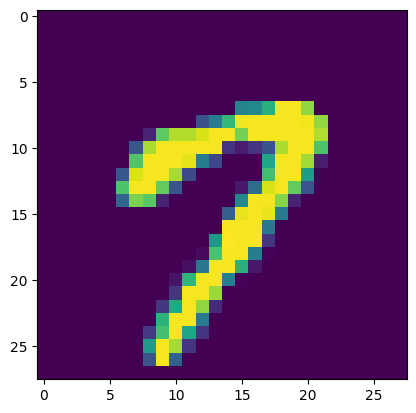

In [ ]:
def one_digit(data, digit):
    for x in data:
        if np.argmax(x[1]) == digit:
            return x[0]
one7 = one_digit(train,7)
print(one7.shape)
img7 = (np.reshape(one7, (28, 28)))
print(img7.shape)

from matplotlib import pyplot as plt
plt.imshow(img7)


(28, 28)
2


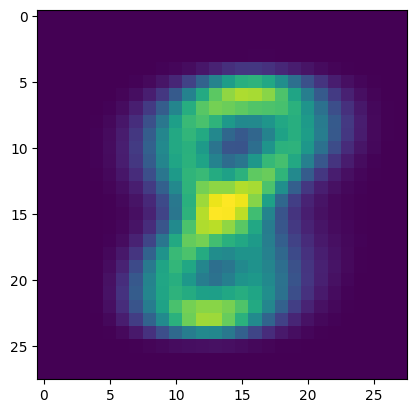

In [ ]:
from matplotlib import pyplot as plt
img = (np.reshape(avg_eight, (28, 28)))

plt.imshow(img)
#plt.imshow(img, cmap='gray')
print(img.shape) # 结果是(28,28)
print(img.ndim) # 结果是(2)

plt.show()